# **HW1: Mathematical Modeling Fundamentals**

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = "retina"

## **Problem 1: Hot Topic Immigration**

It is commonly claimed in the United States that "immigrants [in the United States] depress
wages and take jobs away from native-born Americans." While a narrative can easily be attached to this assertion upon first glance, observing census data on immigration population in the United States will allow for actual information to tell a story and provide us with reason to throw this hypothesis out or not throw it out at all.

### **1.1: Load data from Census Bureau**

In [3]:
df_foreign_born: pd.DataFrame = pd.read_excel("data/immigration_census_data.xlsx")
df_foreign_born.head()

,Rank & State,Foreign-Born Population (percent),Foreign-Born Population (total),Native Population,Foreign-Born Population w/ Citizenship,Most Common Country of Origin
0,1. CALIFORNIA,0.270,10437630,28216576,0.492,Mexico
1,2. NEW YORK,0.226,4442247,15255210,0.545,Dominican Rep.
2,3. NEW JERSEY,0.218,1943338,6972118,0.539,India
3,4. FLORIDA,0.199,3967671,15966780,0.538,Cuba
4,5. NEVADA,0.193,547696,2291476,0.467,Mexico


Ensure that state data can be added to the easily be merged, so extract the column of states and ensure that a column with just state names exists.

In [4]:
df_foreign_born["State"] = [
    re.sub(r'^\d+\. ', '', state).title()  # Regex generated by ChatGPT
    for state in df_foreign_born.loc[:,"Rank & State"]
]
df_foreign_born.loc[df_foreign_born["State"] == "District Of Columbia", "State"] = "District of Columbia"
df_foreign_born.head()

,Rank & State,Foreign-Born Population (percent),Foreign-Born Population (total),Native Population,Foreign-Born Population w/ Citizenship,Most Common Country of Origin,State
0,1. CALIFORNIA,0.270,10437630,28216576,0.492,Mexico,California
1,2. NEW YORK,0.226,4442247,15255210,0.545,Dominican Rep.,New York
2,3. NEW JERSEY,0.218,1943338,6972118,0.539,India,New Jersey
3,4. FLORIDA,0.199,3967671,15966780,0.538,Cuba,Florida
4,5. NEVADA,0.193,547696,2291476,0.467,Mexico,Nevada


### **1.2: Observe Median Wages in Each State**

Observing median wages in each state can help us in crafting a story of whether or not the hypothesis about immigrants depressing wages can be proven false. Median wage data from the U.S Bureau of Labor Statistics from 2022 can be found <a href="https://www.statsamerica.org/sip/rank_list.aspx?rank_label=ow_c&item_in=00-0000&ct=S09">here</a>. 

In [5]:
df_median_wages: pd.DataFrame = pd.read_excel("data/median_wages_by_state.xlsx") 
df_median_wages.rename(columns={"Rank": "wage_rank"})
df_median_wages.head()

,Rank,State,FIPS Code,Median Annual Wage
0,1,District of Columbia,11000,82930
1,2,Massachusetts,25000,58450
2,3,Washington,53000,56320
3,4,New York,36000,52470
4,5,Alaska,2000,52000


Left-join this data onto the immigration data to have a more hollistic, complete dataset that can approach this hypothesis. 

In [6]:
df: pd.DataFrame = df_foreign_born.merge(df_median_wages, on="State", how="left")
df.head()

,Rank & State,Foreign-Born Population (percent),Foreign-Born Population (total),Native Population,Foreign-Born Population w/ Citizenship,Most Common Country of Origin,State,Rank,FIPS Code,Median Annual Wage
0,1. CALIFORNIA,0.270,10437630,28216576,0.492,Mexico,California,10,6000,49740
1,2. NEW YORK,0.226,4442247,15255210,0.545,Dominican Rep.,New York,4,36000,52470
2,3. NEW JERSEY,0.218,1943338,6972118,0.539,India,New Jersey,8,34000,51080
3,4. FLORIDA,0.199,3967671,15966780,0.538,Cuba,Florida,38,12000,40820
4,5. NEVADA,0.193,547696,2291476,0.467,Mexico,Nevada,39,32000,40810


### **1.3: Plot a Graph of Immigrant % (x) vs. Median Wage (y)**

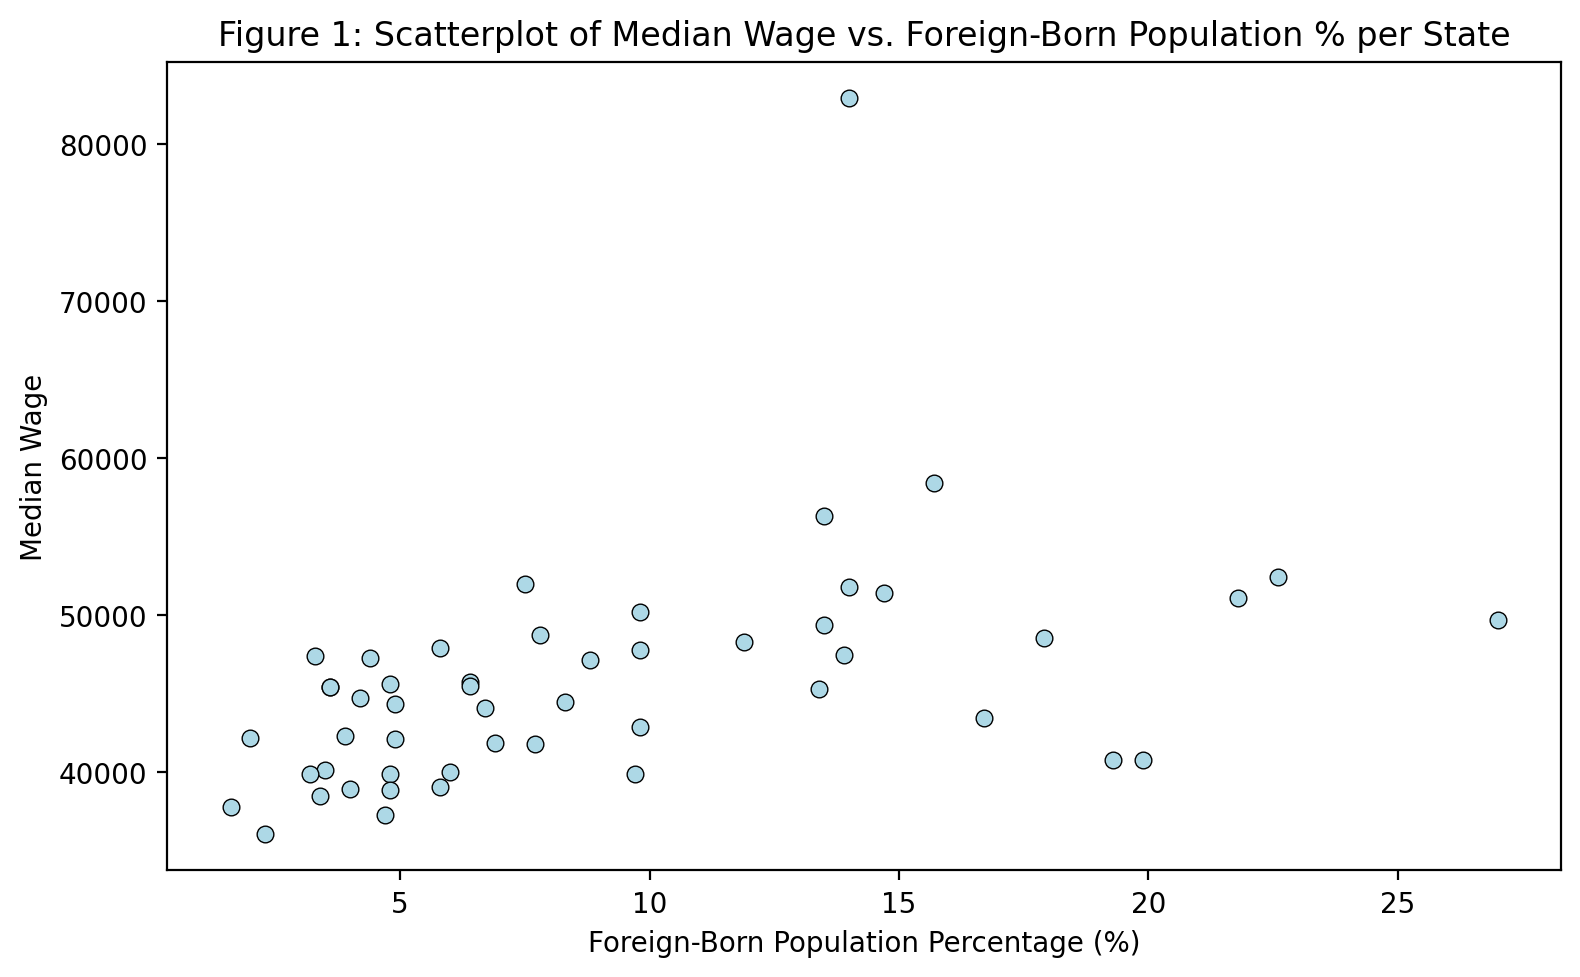

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df["Foreign-Born Population (percent)"]*100, 
    df["Median Annual Wage"], 
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("Foreign-Born Population Percentage (%)")
ax.set_ylabel("Median Wage")
ax.set_title("Figure 1: Scatterplot of Median Wage vs. Foreign-Born Population % per State")
fig.tight_layout()
fig.savefig("plots/figure1.png")
plt.show()

Check the distribution of median wages to determine whether or not an extreme outlier like washington should be removed.

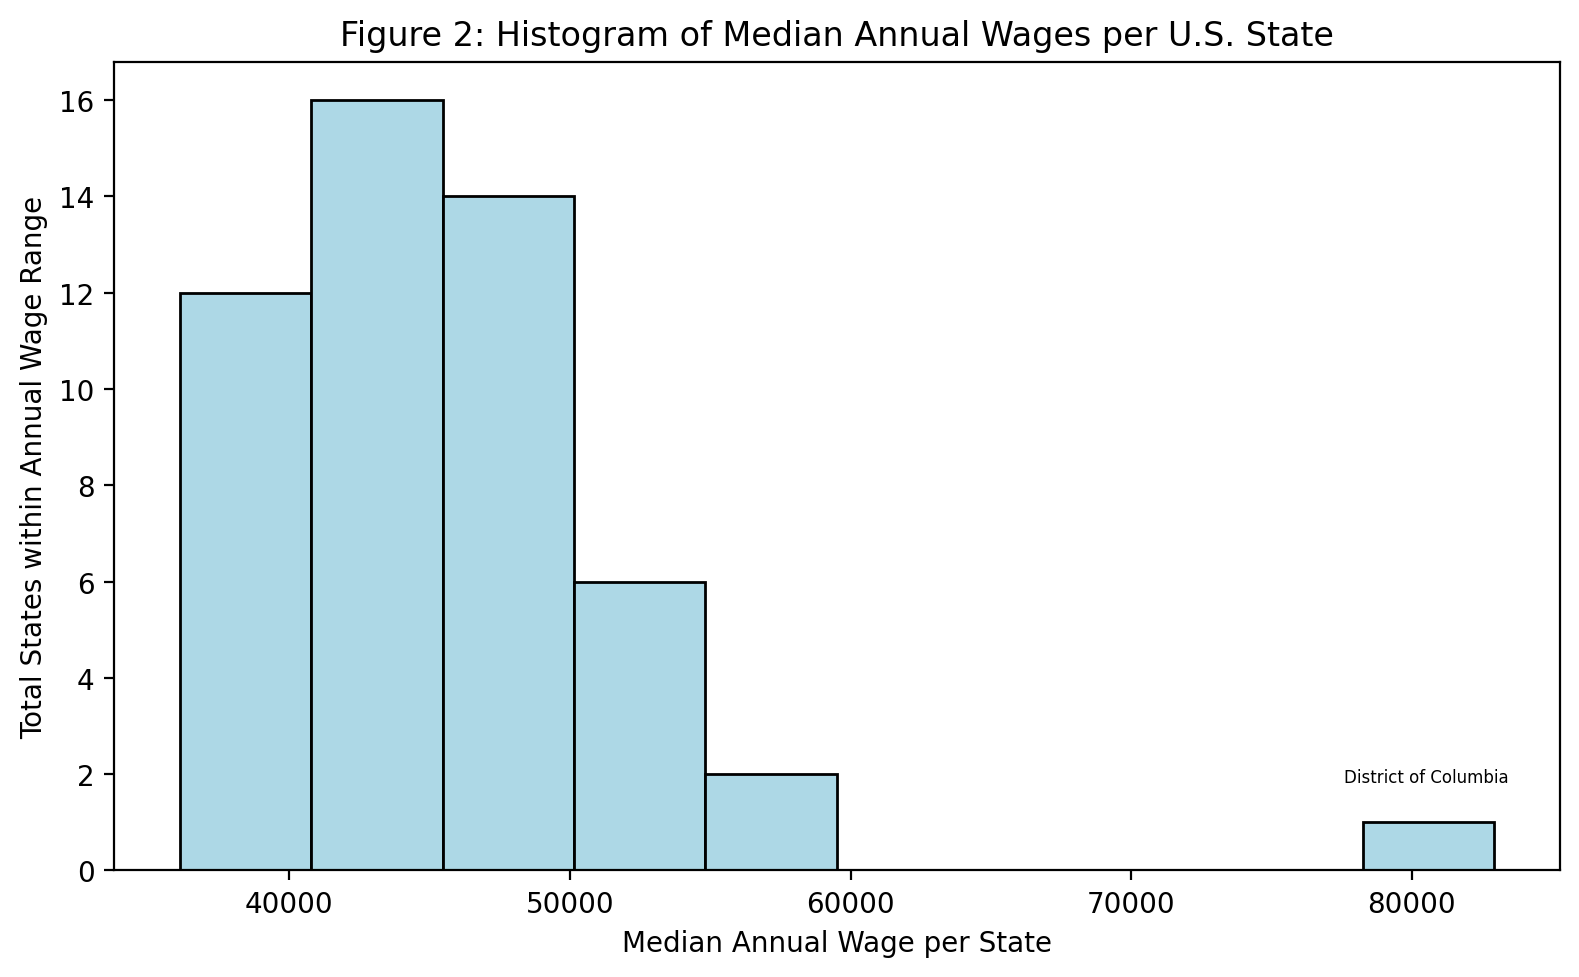

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
plt.hist(df["Median Annual Wage"], bins=10, color='lightblue', edgecolor='black')

plt.xlabel("Median Annual Wage per State")
plt.ylabel("Total States within Annual Wage Range")
plt.title("Figure 2: Histogram of Median Annual Wages per U.S. State")

dc_wage = df[df["State"] == "District of Columbia"]["Median Annual Wage"].values[0]
plt.annotate('District of Columbia', (80500, 1.25), textcoords="offset points", xytext=(0,10), ha='center', size=6)

fig.tight_layout()
fig.savefig("plots/figure2.png")
plt.show()

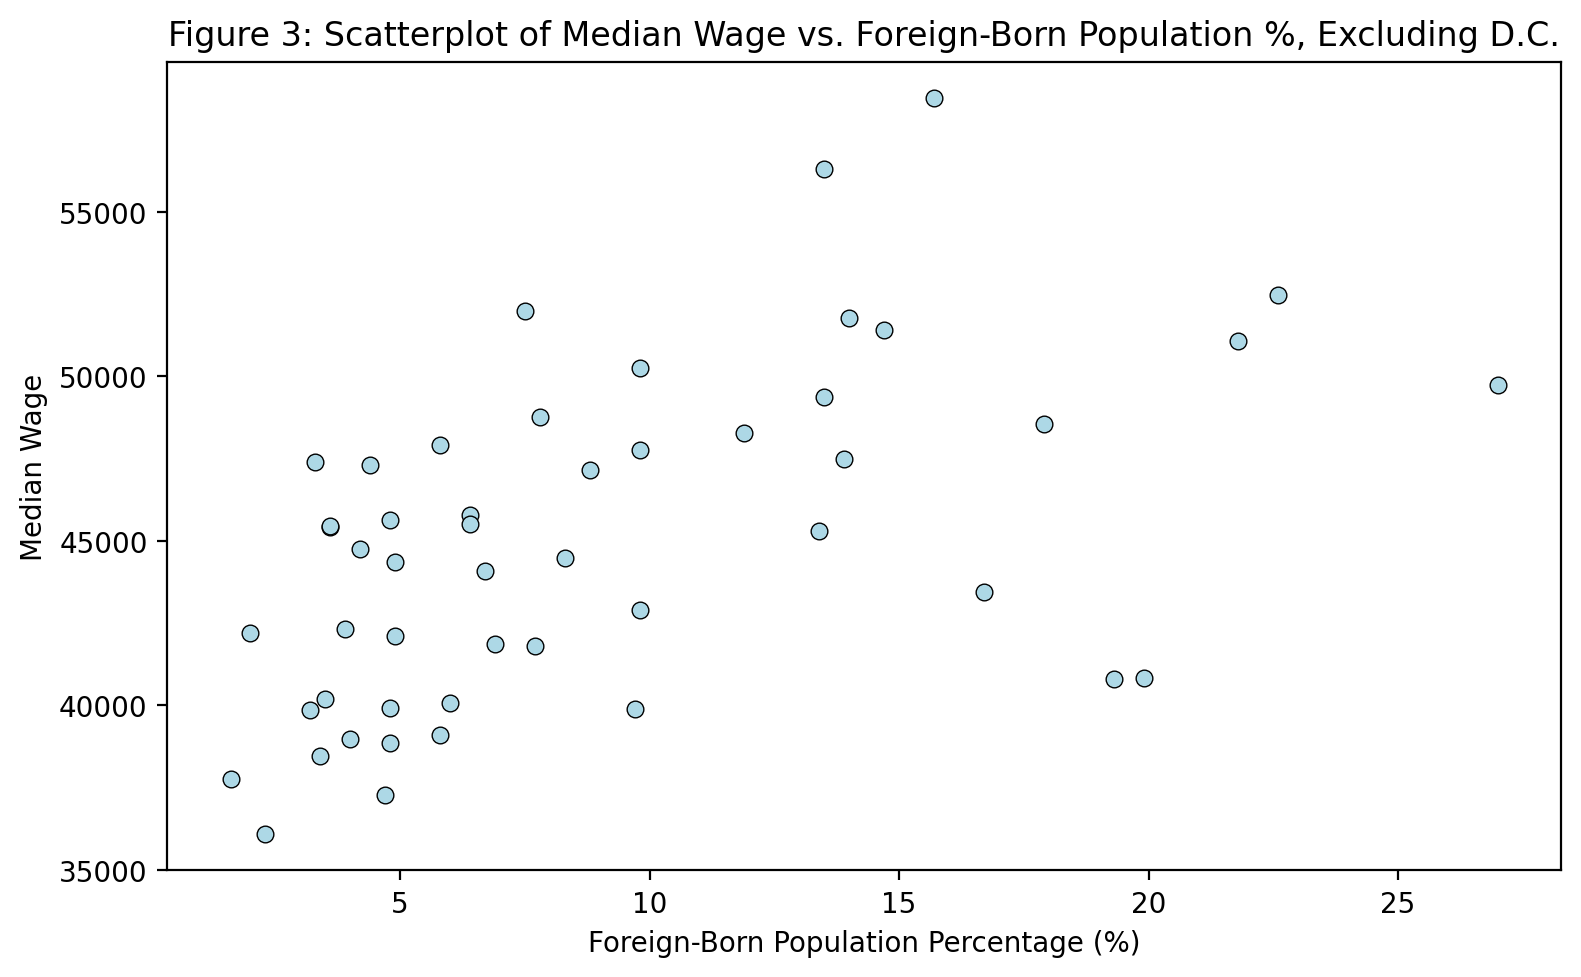

In [24]:
df_filtered = df[df["State"] != "District of Columbia"]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df_filtered["Foreign-Born Population (percent)"]*100, 
    df_filtered["Median Annual Wage"], 
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("Foreign-Born Population Percentage (%)")
ax.set_ylabel("Median Wage")
ax.set_title("Figure 3: Scatterplot of Median Wage vs. Foreign-Born Population %, Excluding D.C.")

fig.tight_layout()
fig.savefig("plots/figure3.png")
plt.show()

In `Figure 3`, there seems to be a somewhat positive correlation between median wage in U.S. states and foreign-born population percentage within each state. However, this trend is likely not linear, since this increase appears to taper off as foreign-born population percentage increases beyond the 16% range.